## Introduction to Data Visualization in Python

In this notebook, we will explore how to create basic visualizations using Python. This notebook builds on the lessons you have learned in using the NumPy, and Pandas libraries. 

### Types of Basic Visualizations

In this notebook, we will explore the following types of visualizations, each useful for answering different types of questions:
1. **Bar Charts**: Useful for comparing quantities among different groups.
2. **Histograms**: Great for showing the distribution of data.
3. **Scatter Plots**: Helpful for observing relationships between variables.
4. **Line Plots**: Ideal for showing trends over time.

Note that we are intentionally excluding one the most basic and most commnon types of data visualizations: the pie chart. Pie charts have many flaws, which you can read about [here](https://towardsdatascience.com/the-case-against-the-pie-chart-43f4c3fccc6). There are always better options! 

### Getting Started with Visualization in Python

We'll use the following libraries:
- `matplotlib`: https://matplotlib.org/
- `seaborn`: https://seaborn.pydata.org/

Both libraries allow you to do a huge variety of data visualizations. Let's start by importing them, along with `pandas` and `numpy`, which we have seen before. 

In [1]:
# first install matplotlib and seaborn if you have not yet
# comment these lines out after installing
#%pip install matplotlib
#%pip install seaborn

# then we can import and assign aliases
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
collegesDat = pd.read_csv('data/colleges.csv')

# (1) Bar charts


Bar charts are a type of graphical representation used to display and compare the frequency, count, or other measure (like mean) for different discrete categories or groups. In a bar chart, each category is represented by a bar, where the length (or height, depending on the orientation) of the bar is proportional to the value it represents.


### Things to Keep in Mind

1. **Appropriate Scale**: The scale of the axis should be chosen appropriately to accurately represent the data without exaggeration or minimization. Avoid truncating the y-axis! Starting the y-axis at a value greater than zero can exaggerate differences between groups and mislead the viewer.
2. **Labeling**: Proper labeling of axes, including units of measurement, is essential for clarity.
3. **Order of Bars**: The sequence of the bars can affect how the data is perceived. In some cases, it may be beneficial to sort the bars by size or in a particular order.
4. **Color and Design**: The use of color and design should enhance readability, not distract from the data. Overly complex designs can make the chart difficult to interpret.
5. **Overcrowding**: Including too many categories can make the chart cluttered and hard to read.

As an example, let's create a simple bar chart that compares "highest degree" across all the colleges in our colleges dataset. 

highest_degree
Graduate       1464
Certificate    1374
Associates     1096
Bachelors       501
Name: count, dtype: int64


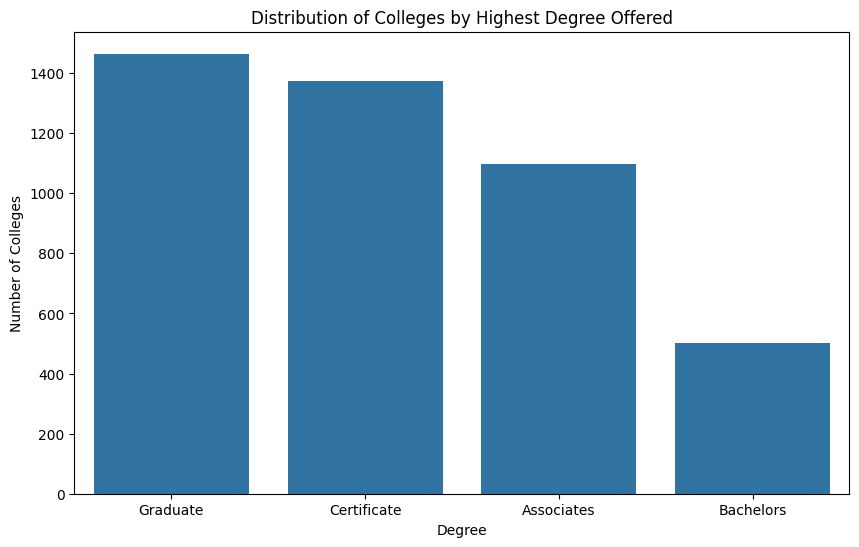

In [18]:
# First we need to get counts of all the categories
highest_degree_counts = collegesDat['highest_degree'].value_counts()

# Let's take a look
# Print numbers
print(highest_degree_counts)

# This line creates a new figure for plotting with a specified size.
# This isn't necessary but allows you to size the plot 
plt.figure(figsize=(10, 6)) # this is specifying 10 in wide and 6 in tall

# This line creates a bar plot using the Seaborn library.
# sets the x-axis values to be the indices of the highest_degree_counts DataFrame
# sets the y-axis values to be the actual counts corresponding to each category in highest_degree_counts.
sns.barplot(x=highest_degree_counts.index, y=highest_degree_counts.values)

# The following lines specify labels
plt.title('Distribution of Colleges by Highest Degree Offered')
plt.xlabel('Degree')
plt.ylabel('Number of Colleges')

# This prints the plot
plt.show()


Now let's expand a little by creating a bar chart that allows for making comparisons with multiple bars nested within another category. Specifically, let's look at the the distribution of highest-degee institutions within each region. 

                 region highest_degree  count
0              Far West     Associates    172
1              Far West      Bachelors     89
2              Far West    Certificate    196
3              Far West       Graduate    160
4               Midwest     Associates    261
5               Midwest      Bachelors    118
6               Midwest    Certificate    324
7               Midwest       Graduate    371
8             Northeast     Associates    189
9             Northeast      Bachelors     89
10            Northeast    Certificate    328
11            Northeast       Graduate    384
12  Rockies & Southwest     Associates    196
13  Rockies & Southwest      Bachelors     56
14  Rockies & Southwest    Certificate    209
15  Rockies & Southwest       Graduate    159
16                South     Associates    277
17                South      Bachelors    132
18                South    Certificate    311
19                South       Graduate    352


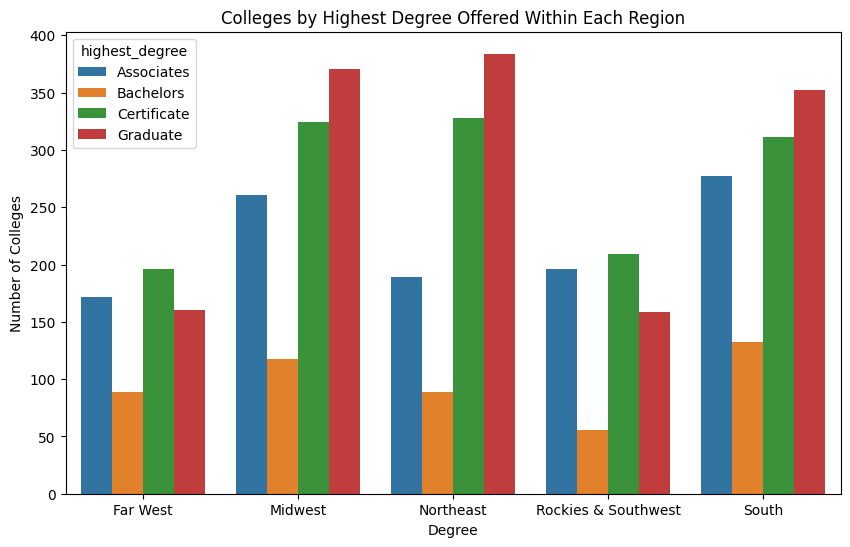

highest_degree
Graduate       1464
Certificate    1374
Associates     1096
Bachelors       501
Name: count, dtype: int64


In [17]:
# First we need to get counts of all the categories 
# Here we use the groupby() function
region_degree_counts = collegesDat.groupby(['region', 'highest_degree']).size().reset_index(name='count')

# Let's see what this looks like
#print(region_degree_counts)

# Let's drop territories and US Service Schools
region_degree_counts_mod = region_degree_counts[~region_degree_counts['region'].isin(['Territories','US Service Schools'])]
print(region_degree_counts_mod)

# This line creates a new figure for plotting with a specified size.
# This isn't necessary but allows you to size the plot 
plt.figure(figsize=(10, 6)) # this is specifying 10 in wide and 6 in tall

# This line creates a bar plot using the Seaborn library.
# sets the x-axis values to be the indices of the highest_degree_counts DataFrame
# sets the y-axis values to be the actual counts corresponding to each category in highest_degree_counts.
sns.barplot(x='region', y='count', hue='highest_degree', data=region_degree_counts_mod)

# The following lines specify labels
plt.title('Colleges by Highest Degree Offered Within Each Region')
plt.xlabel('Degree')
plt.ylabel('Number of Colleges')

# This prints the plot
plt.show()


# (2) Histograms

A histogram is used to show the distribution of numeric data. It is essentially a bar chart that groups data points into ranges or 'bins'. Each bin represents a range of values, and the height of the bar shows the frequency or number of data points that fall within that range.

Histograms are valuable for visualizing and understanding the distribution of a dataset. They show how data is spread out, which can highlight patterns like normal distribution, skewness, or bimodality. Histograms can make it easier to spot outliers and unusual patterns in the data, which might require further investigation.

Histograms can be used to compare distributions across different datasets or groups within a dataset. By revealing the distribution's shape, histograms can inform the choice of statistical tests or models to apply.

### Things to Keep in Mind

1. **Number of Bins**: The choice of the number of bins (or the width of each bin) can significantly affect the histogram's appearance and the conclusions drawn from it. Too many bins can make the data appear noisy, while too few can oversimplify the distribution.
2. **Starting Point of Bins**: The place where bins start can affect the histogram's appearance. Different starting points can sometimes lead to different interpretations.
3. **Unequal Bin Widths**: Bins are typically of equal size, but if they aren’t, it should be clearly indicated as it affects interpretation.
4. **Axis Scale**: Be mindful of the scale on the y-axis. It usually represents frequency or density, and misrepresenting this can lead to misinterpretation.

Let's look at some examples. 

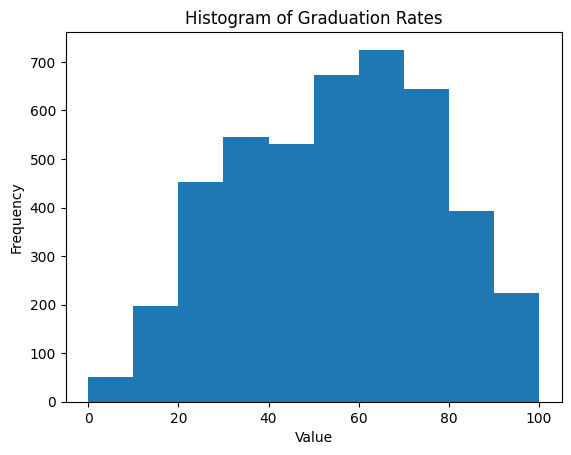

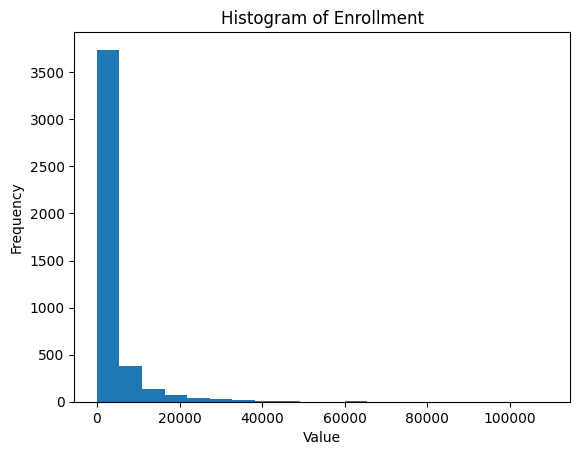

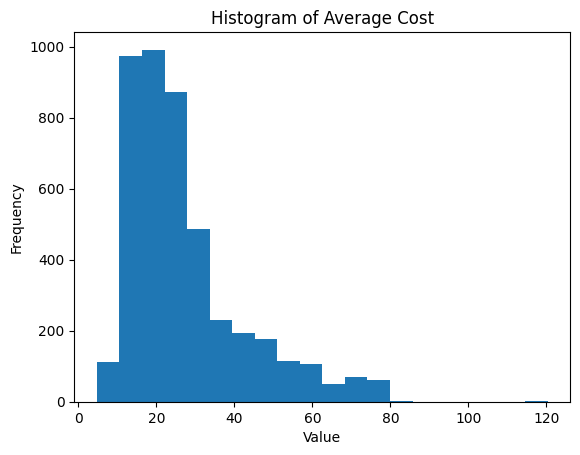

In [4]:
# Creating the histogram of graduate rates
plt.hist(collegesDat['grad_rate'], bins=10)
plt.title('Histogram of Graduation Rates')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Creating the histogram of enrollment
plt.hist(collegesDat['enrollment'], bins=20)
plt.title('Histogram of Enrollment')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Creating the histogram of enrollment
plt.hist(collegesDat['avg_cost'], bins=20)
plt.title('Histogram of Average Cost')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### Explanation of Scatter Plots

A scatter plot is a type of data visualization that displays values from two variables as points on a two-dimensional graph. Each point represents an observation. The position on the horizontal (x) and vertical (y) axes represents the values of the two variables.

Scatter plots are used to observe and show relationships between two numeric variables. They can reveal if a change in one variable might be associated with a change in another (correlation). These plots can help in identifying different types of relationships between variables, such as linear, nonlinear, or no relationship. They are also useful for spotting outliers or anomalies that may indicate errors or special cases. Moreover, scatter plots can give a general idea of data distribution and density.

When deciding which variable to place on the x-axis and which to place on the y-axis in a scatter plot, you might think about dependent vs. independent Variables:
- Dependent Variable: The dependent variable is the variable you want to try to explain or to see how it varies based on the independent variable. The dependent variable is placed on the y-axis (vertical axis).
- Independent Variable: Typically, the independent variable is an explanatory variable. It is placed on the x-axis (horizontal axis).

### Things to Keep in Mind

1. **Correlation vs. Causation**: A common misconception is to assume that correlation implies causation. Just because two variables show a relationship in a scatter plot does not mean one variable causes the other to change.
2. **Overplotting**: With large datasets, points on a scatter plot can overlap, making it difficult to see individual data points or understand the data's distribution. This issue can be mitigated with techniques like alpha blending, jittering, or using a hexbin plot.
3. **Scale and Range**: The choice of scale and range for the axes can dramatically affect the plot's appearance and interpretability. It's essential to use scales and ranges that accurately represent the data.
4. **Interpretation**: Be cautious about drawing conclusions from scatter plots, especially when the relationship isn't clear or data points are sparse.

Let's look at example using 

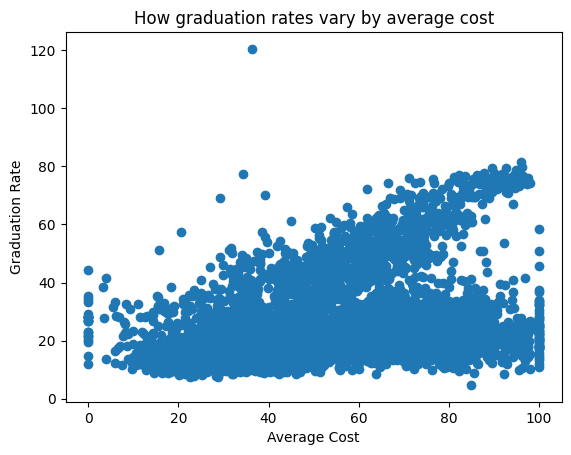

In [5]:
# Creating the scatter plot using matplotlib.pyplot
plt.scatter(collegesDat['grad_rate'],collegesDat['avg_cost'])
plt.title('How graduation rates vary by average cost')
plt.xlabel('Average Cost')
plt.ylabel('Graduation Rate')
plt.show()


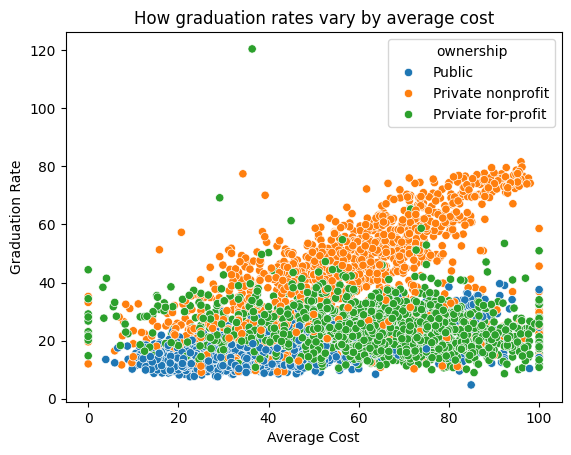

In [6]:
# Creating the scatter plot using seaborn
sns.scatterplot(data = collegesDat, x ='grad_rate', y = 'avg_cost', hue='ownership')
plt.title('How graduation rates vary by average cost')
plt.xlabel('Average Cost')
plt.ylabel('Graduation Rate')
plt.show()





# Line graphs

Line graphs are most commmonly used to display quantitative information over time. That is, time is on the x-axis and the variable for which we want to explore trends over time is on the y-axis. However, line graphs may also have some  other ordering along the x-axis - for example a dosage of a drug, or expense in dollars. 

### Things to Keep in Mind

**Make sure the graph is right for the data:** Line graphs are best suited for data with a logical sequence. Using them for discrete, unordered categories can be misleading.
**Scale**: The choice of scale on the axes can dramatically change the perception of data. Misrepresenting this can lead to misinterpretation.
**Number of lines:** Including too many lines on a single graph can lead to clutter and confusion. We'll see an example of this below. 

For an example line graph, we are going to use a different dataset. Each observation in this new data set is a UFO sighting. One of the variables is the year of the UFO sighting (`Dates.Documented.Date). Let's plot the number of sightings by year. 



Dates.Documented.Year
1998     633
1999    2597
2000    2121
2001    2437
2002    2876
2003    3352
2004    3706
2005    3891
2006    3178
2007    3722
2008    4116
2009    4549
2010    3504
2011    4574
2012    6643
2013    6214
2014    2519
dtype: int64


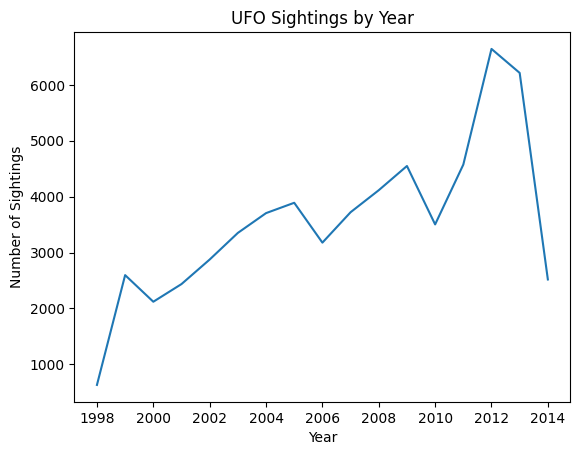

In [8]:
# Here we read in the data. 
ufoDat = pd.read_csv('data/ufo_sightings.csv')

# Here we group the data by year and count the number of observations by year.
sightings_by_year = ufoDat.groupby('Dates.Documented.Year').size()

# Let's take a look 
print(sightings_by_year)

# Then we can plot this
plt.plot(sightings_by_year.index, sightings_by_year)
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()



In [ ]:
#help(plt.plot)

In [ ]:
# Then we can plot this
plt.plot(sightings_by_year.index, sightings_by_year, color= "red")
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()



In [ ]:
# Here we group the data by year and count the number of observations by year.
sightings_by_year_shape = ufoDat.groupby(['Dates.Documented.Year','Location.State']).size()


# Let's take a look
#print(sightings_by_year_shape)

# We need to rearrange
pivot_sightings = sightings_by_year_shape.unstack(level='Location.State')

# Let's take another look
#print(pivot_sightings)

# Then we plot
pivot_sightings.plot(kind='line', figsize=(10, 6))
plt.title('UFO Sightings by Location Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


This is a mess. But what if we want to focus on how a particular state compares to all the others? 

In [ ]:
# designate state to highlight
highlight_state = 'NC'  

# this is more complicated code that we will get to later
# we are using a for loop and if else...
for state in pivot_sightings.columns:
    if state == highlight_state:
        plt.plot(pivot_sightings.index, pivot_sightings[state], label=state, color='green', linewidth=2)
    else:
        plt.plot(pivot_sightings.index, pivot_sightings[state], color='gray', alpha=0.5)

plt.title('UFO Sightings in California By Year, Compared to Other States')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.legend()
plt.show()

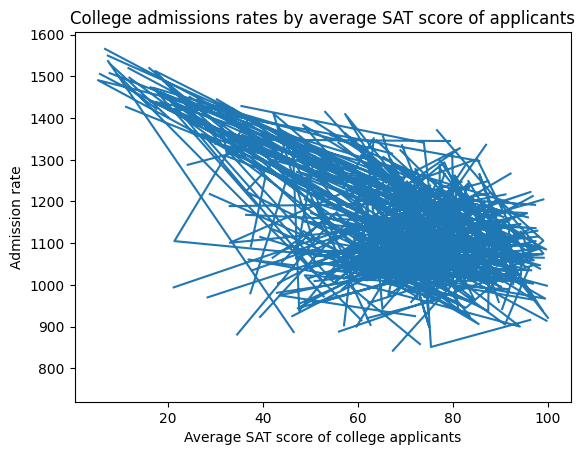

In [22]:
# Here we group the data by year and count the number of observations by year.
#sightings_by_year = ufoDat.groupby('Dates.Documented.Year').size()

# Let's take a look 
#print(sightings_by_year)

# Then we can plot this
plt.plot(collegesDat['admit_rate'], collegesDat['SAT_avg'])
plt.title('College admissions rates by average SAT score of applicants')
plt.xlabel('Average SAT score of college applicants')
plt.ylabel('Admission rate')
plt.show()